In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")


STOCK_DICT = {'Apple': 'AAPL', 'Tesla': 'TSLA', 'Amazon': 'AMZN', 'Visa': 'V', 'Microsoft': 'MSFT'}
START = '2017-1-1'
END = '2019-12-31'
LAG = 7
df = pd.DataFrame()
for name, symbol in STOCK_DICT.items():
 df[name] = yf.Ticker(symbol).history(start=START, end=END).Close
df.head()

df.dropna(inplace= True)
df.head()




,Apple,Tesla,Amazon,Visa,Microsoft
Date,,,,,
2017-01-03 00:00:00-05:00,26.770882,14.466000,37.683498,74.684151,56.299316
2017-01-04 00:00:00-05:00,26.740915,15.132667,37.859001,75.294792,56.047413
2017-01-05 00:00:00-05:00,26.876902,15.116667,39.022499,76.177818,56.047413
2017-01-06 00:00:00-05:00,27.176542,15.267333,39.799500,77.229996,56.533222
2017-01-09 00:00:00-05:00,27.425463,15.418667,39.846001,76.797844,56.353298


In [ ]:
# remove time from the index
df.reset_index(inplace=True) # Date becomes a column
df['Date'] = df.Date.dt.date # Apply dt.date to Date column
df.set_index('Date', inplace=True)
df.head()


,Apple,Tesla,Amazon,Visa,Microsoft
Date,,,,,
2017-01-03,26.770882,14.466000,37.683498,74.684151,56.299316
2017-01-04,26.740915,15.132667,37.859001,75.294792,56.047413
2017-01-05,26.876902,15.116667,39.022499,76.177818,56.047413
2017-01-06,27.176542,15.267333,39.799500,77.229996,56.533222
2017-01-09,27.425463,15.418667,39.846001,76.797844,56.353298


In [ ]:
# log return = log(today) - log(yesterday) = log(today/yesterday)
df_logreturn = np.log(df/df.shift(1))
df_logreturn.dropna(inplace=True)
df_logreturn.head()

,Apple,Tesla,Amazon,Visa,Microsoft
Date,,,,,
2017-01-04,-0.001120,0.045055,0.004646,0.008143,-0.004484
2017-01-05,0.005072,-0.001058,0.030270,0.011659,0.000000
2017-01-06,0.011087,0.009918,0.019716,0.013718,0.008630
2017-01-09,0.009118,0.009863,0.001168,-0.005611,-0.003188
2017-01-10,0.001008,-0.006115,-0.001281,-0.005396,-0.000320


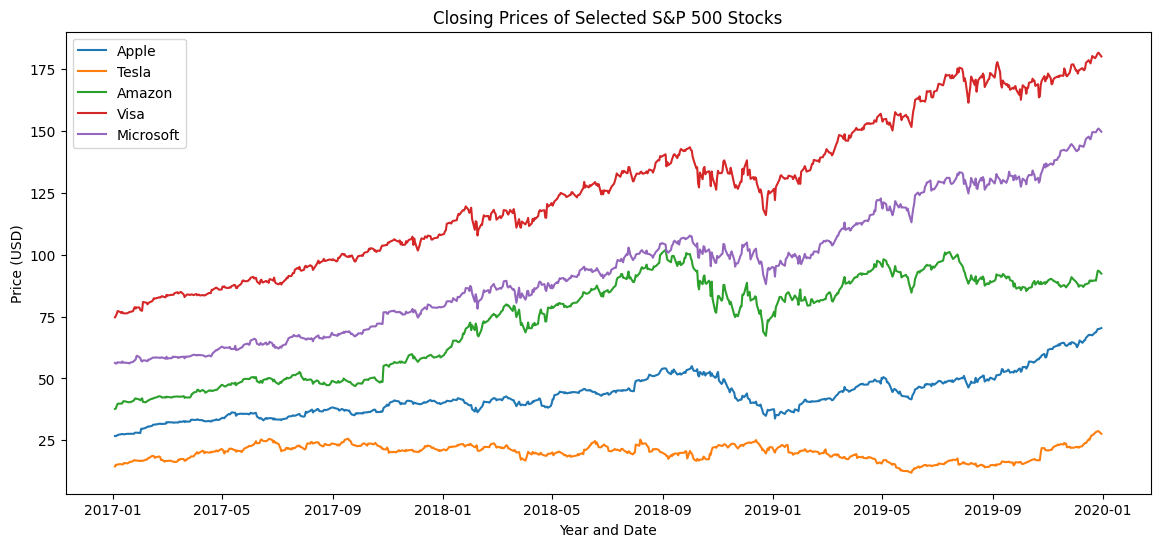

In [ ]:
plt.figure(figsize=(14,6))
for col in df.columns:
    plt.plot(df[col], label=col)

plt.title("Closing Prices of Selected S&P 500 Stocks")
plt.xlabel("Year and Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Custom S&P-like data for my 5 stocks
data = {
    'Symbol': ['AAPL','TSLA','AMZN','V','MSFT','XOM','JNJ','NEE'],
    'Company': ['Apple','Tesla','Amazon','Visa','Microsoft','ExxonMobil','Johnson & Johnson','NextEra Energy'],
    'Sector': ['Technology','Consumer Cyclical','Consumer Cyclical','Financial Services',
               'Technology','Energy','Healthcare','Utilities'],
    'Marketcap': [3e12,0.8e12,1.5e12,0.5e12,3.2e12,0.45e12,0.38e12,0.17e12]
}

df_sector = pd.DataFrame(data)
df_sector

,Symbol,Company,Sector,Marketcap
0,AAPL,Apple,Technology,3.000000e+12
1,TSLA,Tesla,Consumer Cyclical,8.000000e+11
2,AMZN,Amazon,Consumer Cyclical,1.500000e+12
3,V,Visa,Financial Services,5.000000e+11
4,MSFT,Microsoft,Technology,3.200000e+12
5,XOM,ExxonMobil,Energy,4.500000e+11
6,JNJ,Johnson & Johnson,Healthcare,3.800000e+11
7,NEE,NextEra Energy,Utilities,1.700000e+11


/tmp/ipython-input-2533763790.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sec_count = sns.countplot(


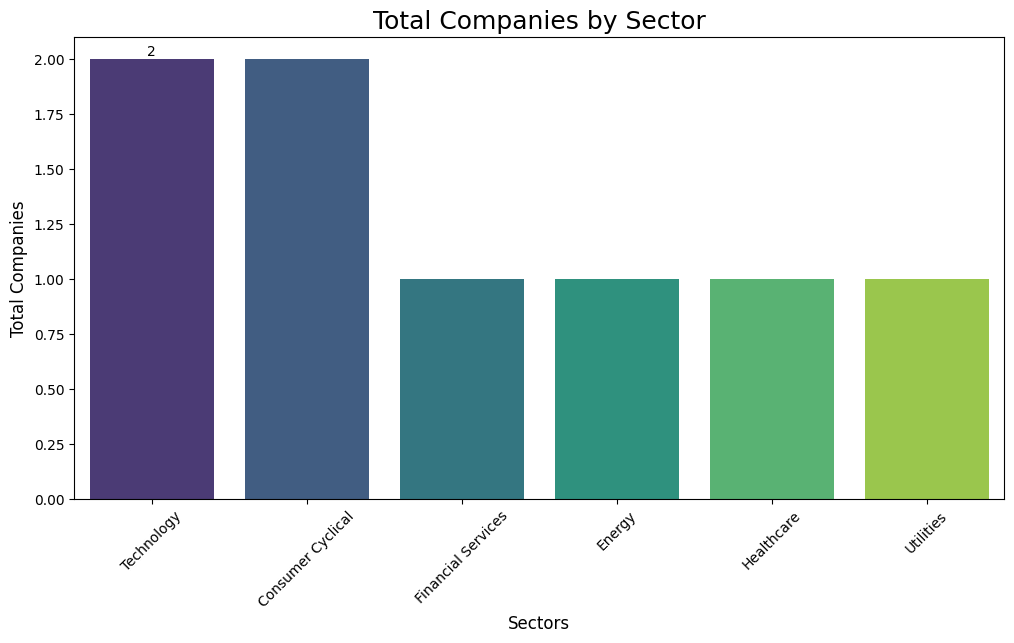

In [14]:
plt.figure(figsize=(12,6))
sec_count = sns.countplot(
    x='Sector',
    data=df_sector,
    order=df_sector['Sector'].value_counts().index,
    palette='viridis'
)

sec_count.bar_label(sec_count.containers[0], label_type='edge')
plt.xticks(rotation=45)
plt.xlabel('Sectors', size=12)
plt.ylabel('Total Companies', size=12)
plt.title('Total Companies by Sector', size=18)
plt.show()

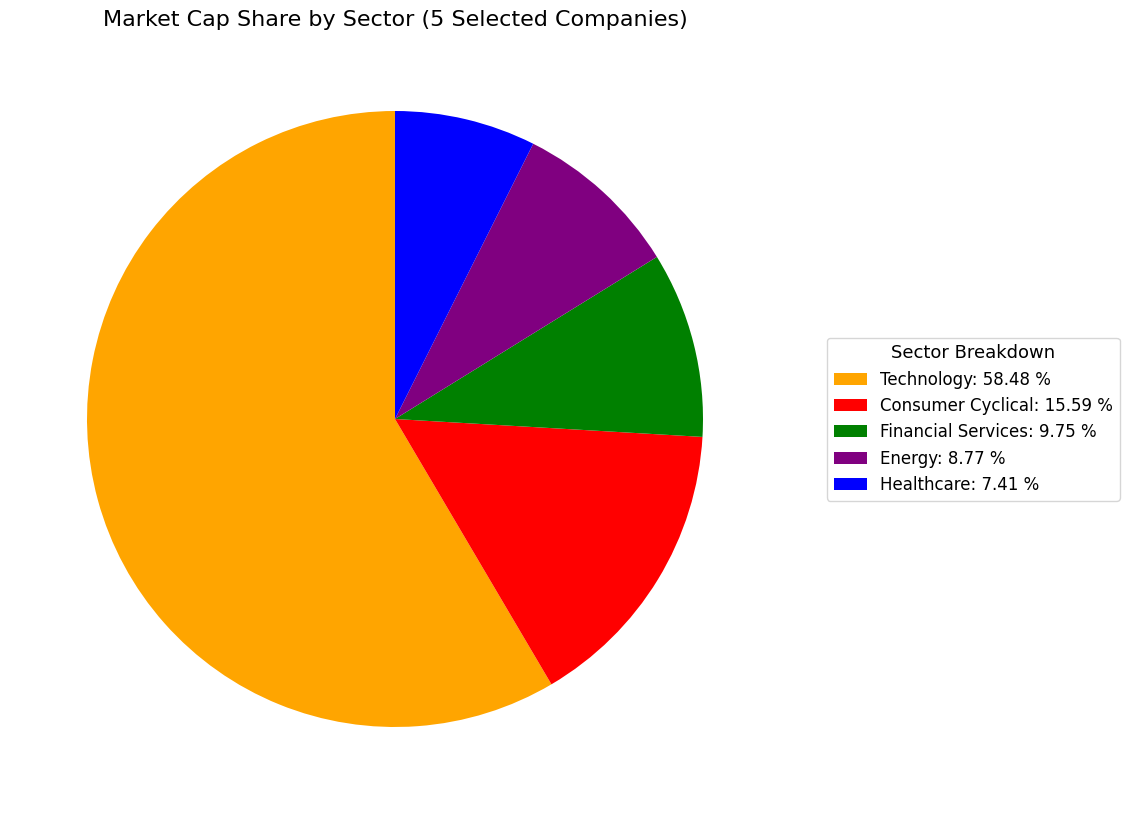

In [24]:
plt.figure(figsize=(10,10))

# Color mapping for 5 sectors
colors = ['orange', 'red', 'green', 'purple', 'blue']

patches, _ = plt.pie(
    secm['Marketcap'],
    #labels=None,                # no labels inside pie
    colors=colors,
    startangle=90,
    #autopct=None                # remove % from inside pie
)

# Create custom labels for the legend box
labels = [
    f"{sector}: {p:.2f} %"
    for sector, p in zip(secm['Sector'], percent)
]

#This is the box you want (just like Kaggle)
plt.legend(
    patches,
    labels,
    loc='center left',
    bbox_to_anchor=(1.05, 0.5),     # move box to the right
    fontsize=12,
    title="Sector Breakdown",        # Optional title
    title_fontsize=13,
    frameon=True                     # draws the box frame
)

plt.title('Market Cap Share by Sector (5 Selected Companies)', fontsize=16)
plt.show()

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Download your 5 companies
STOCK_DICT = {
    'Apple': 'AAPL',
    'Tesla': 'TSLA',
    'Amazon': 'AMZN',
    'Visa': 'V',
    'Microsoft': 'MSFT'
}

START = '2017-01-01'
END = '2019-12-31'

df = pd.DataFrame()
for name, symbol in STOCK_DICT.items():
    df[name] = yf.Ticker(symbol).history(start=START, end=END)['Close']

df.dropna(inplace=True)
df.head()

,Apple,Tesla,Amazon,Visa,Microsoft
Date,,,,,
2017-01-03 00:00:00-05:00,26.770880,14.466000,37.683498,74.684151,56.299313
2017-01-04 00:00:00-05:00,26.740919,15.132667,37.859001,75.294769,56.047421
2017-01-05 00:00:00-05:00,26.876907,15.116667,39.022499,76.177818,56.047421
2017-01-06 00:00:00-05:00,27.176542,15.267333,39.799500,77.229988,56.533222
2017-01-09 00:00:00-05:00,27.425459,15.418667,39.846001,76.797859,56.353283


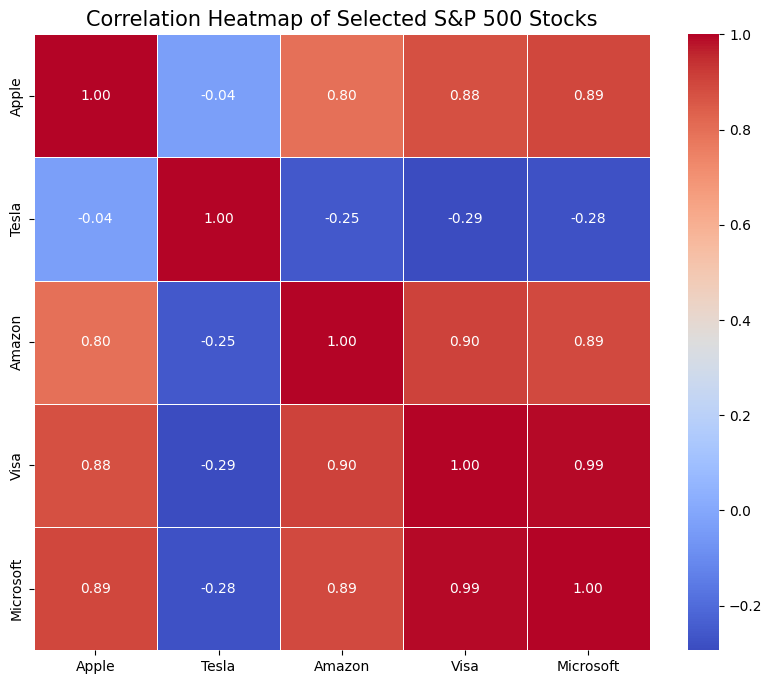

In [39]:
df.columns = ['Apple', 'Tesla', 'Amazon', 'Visa', 'Microsoft']
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation of your 5 stocks
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    square=True
)

plt.title("Correlation Heatmap of Selected S&P 500 Stocks", fontsize=15)
plt.show()

In [40]:
# Build the ML Data sets
import numpy as np
import pandas as pd

# choose the stock you want to predict
target_stock = 'Apple'      # change to 'Tesla', 'Amazon', etc. if you want

# Make a copy with just that column
ml_df = df[[target_stock]].copy()
ml_df.rename(columns={target_stock: 'Price'}, inplace=True)

# Create target = tomorrow's price
ml_df['Target'] = ml_df['Price'].shift(-1)

# Feature engineering: past 5 daily returns
ml_df['Return_1'] = ml_df['Price'].pct_change(1)
ml_df['Return_2'] = ml_df['Price'].pct_change(2)
ml_df['Return_3'] = ml_df['Price'].pct_change(3)
ml_df['Return_4'] = ml_df['Price'].pct_change(4)
ml_df['Return_5'] = ml_df['Price'].pct_change(5)

# Drop rows with NaN created by shift / pct_change
ml_df.dropna(inplace=True)

ml_df.head()


,Price,Target,Return_1,Return_2,Return_3,Return_4,Return_5
Date,,,,,,,
2017-01-10 00:00:00-05:00,27.453117,27.600630,0.001008,0.010177,0.021439,0.026633,0.025484
2017-01-11 00:00:00-05:00,27.600630,27.485388,0.005373,0.006387,0.015605,0.026927,0.032150
2017-01-12 00:00:00-05:00,27.485388,27.436987,-0.004175,0.001175,0.002185,0.011364,0.022640
2017-01-13 00:00:00-05:00,27.436987,27.658247,-0.001761,-0.005929,-0.000588,0.000420,0.009583
2017-01-17 00:00:00-05:00,27.658247,27.655945,0.008064,0.006289,0.002088,0.007472,0.008488


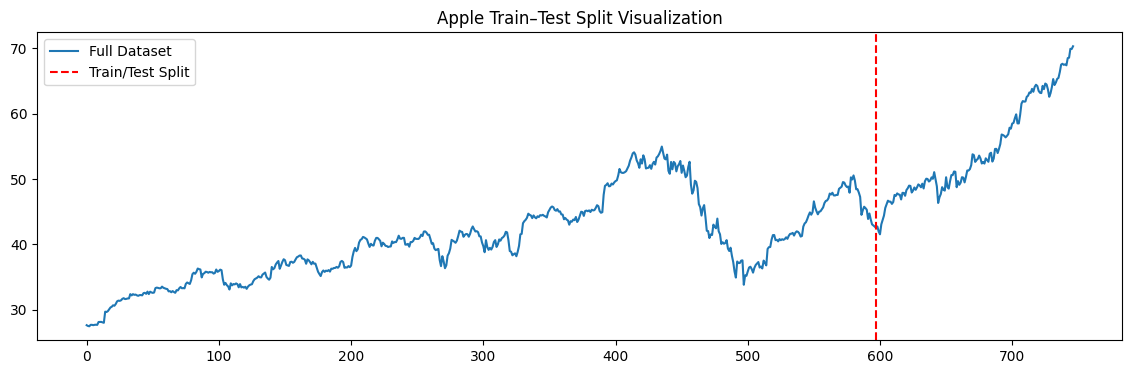

In [47]:
from sklearn.model_selection import train_test_split

X = ml_df[["Price","Return_1","Return_2","Return_3","Return_4","Return_5"]]
y = ml_df["Target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

plt.figure(figsize=(14,4))
plt.plot(y.values, label="Full Dataset")
plt.axvline(len(y_train), color='red', linestyle='--', label="Train/Test Split")
plt.title(f"{target_stock} Train–Test Split Visualization")
plt.legend()
plt.show()

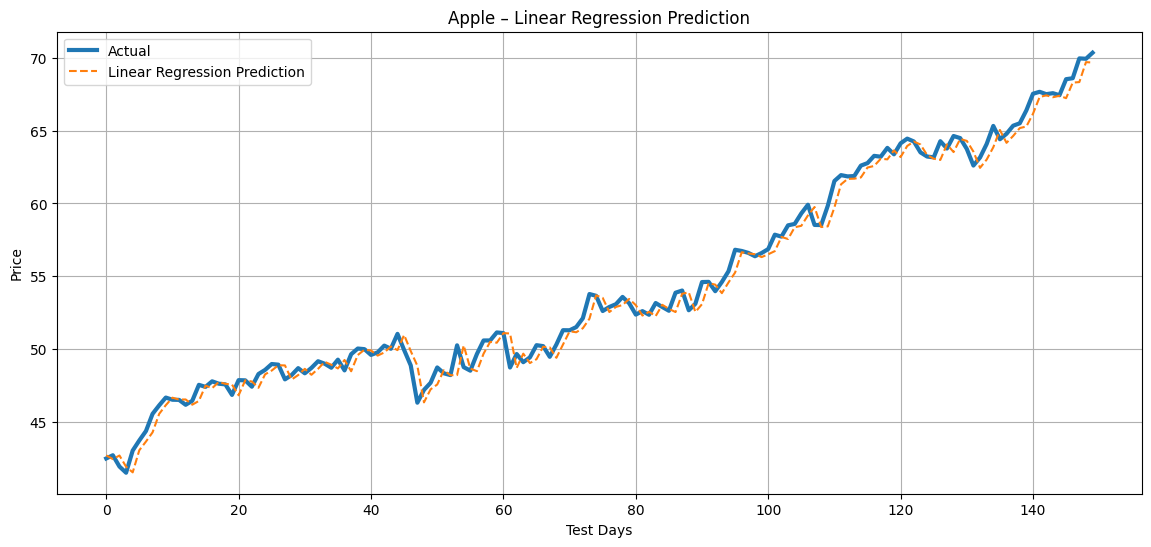

In [51]:
# Linear Regressiin model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
plt.figure(figsize=(14,6))
plt.plot(y_test.values, label="Actual", linewidth=3)
plt.plot(lr_pred, label="Linear Regression Prediction", linestyle="--")
plt.title(f"{target_stock} – Linear Regression Prediction")
plt.xlabel("Test Days")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

Random Forest MAE: 3.977279958597819
Random Forest R^2: 0.27208888059747727


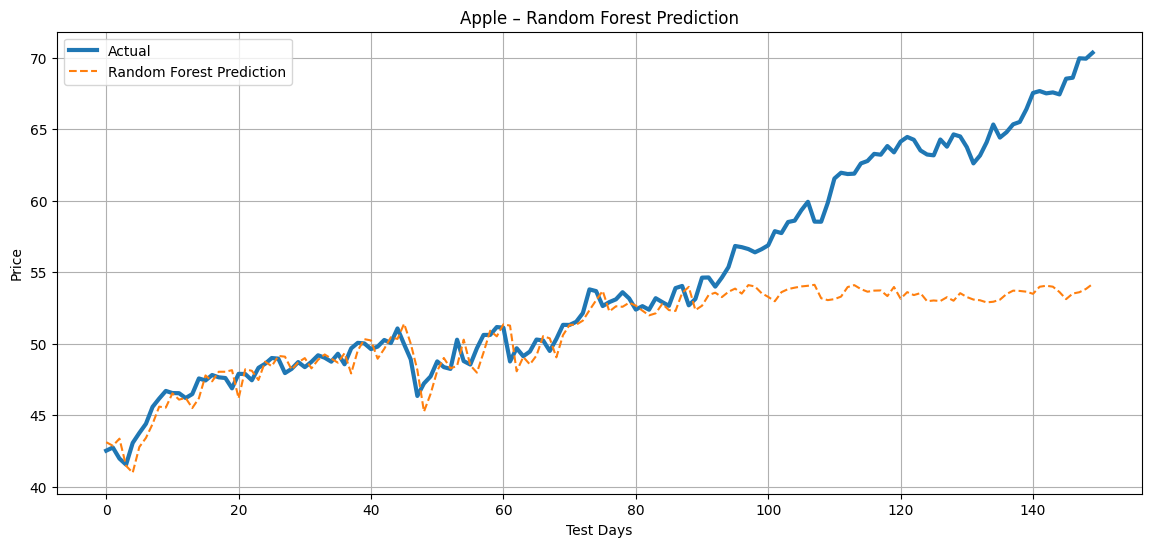

In [53]:
# Random forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    max_depth=None
)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2  = r2_score(y_test, rf_pred)

print("Random Forest MAE:", rf_mae)
print("Random Forest R^2:", rf_r2)


plt.figure(figsize=(14,6))
plt.plot(y_test.values, label="Actual", linewidth=3)
plt.plot(rf_pred, label="Random Forest Prediction", linestyle="--")
plt.title(f"{target_stock} – Random Forest Prediction")
plt.xlabel("Test Days")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()



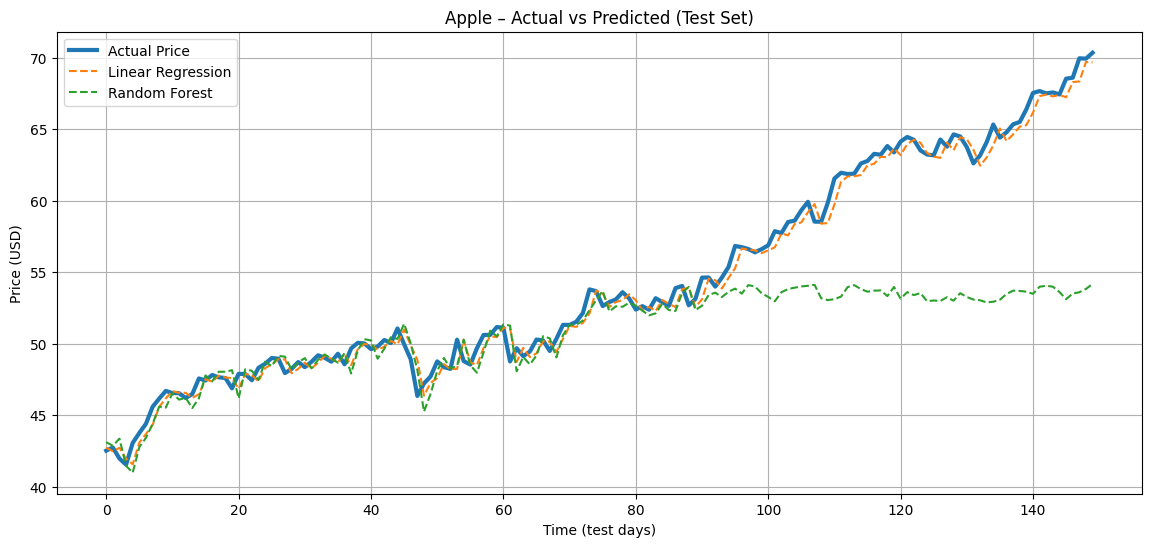

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

plt.plot(y_test.values, label='Actual Price', linewidth=3)
plt.plot(lr_pred, label='Linear Regression', linestyle='--')
plt.plot(rf_pred, label='Random Forest', linestyle='--')

plt.title(f"{target_stock} – Actual vs Predicted (Test Set)")
plt.xlabel("Time (test days)")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [52]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE": [
        mean_absolute_error(y_test, lr_pred),
        mean_absolute_error(y_test, rf_pred)
    ],
    "R2 Score": [
        r2_score(y_test, lr_pred),
        r2_score(y_test, rf_pred)
    ]
})
results

,Model,MAE,R2 Score
0,Linear Regression,0.615027,0.988167
1,Random Forest,3.977280,0.272089
